In [1]:
import csv
import obspy
import matplotlib.pyplot as plt
from obspy import UTCDateTime
from obspy.clients.iris import Client

In [2]:
client = Client()

# Define catalog duration
year1 = 2021
year2 = 2022

# Define stations provider
provider1 = "IRIS" 
provider2 = "GFZ"

# Reading the catalog
catalog = f"./Events/events_{year1}-{year2}.csv"

# Store the event names
event_names = []

with open(catalog, "r") as csvfile:
    events = csv.reader(csvfile, delimiter=',')
    next(events, None)  # Skip the headers
    
    for i, event in enumerate(events):
        if (i <= 5):   # Only check nth event's waveforms
            origin_time = UTCDateTime(event[0])
            year = event[0][0:4]
            event_fname = "".join(event[0].split("T")[0].split("-")) + "".join("".join("".join(event[0].split("T")[1].split("Z")).split(".")).split(":"))
            event_names.append(event_fname)
            lon = event[2]
            lat = event[1]
            print(origin_time,lon,lat)

2021-12-31T05:53:42.198000Z  120.43380  0.04880
2021-12-30T19:19:29.687000Z  -176.34680  -28.77320
2021-12-30T13:24:36.748000Z  -155.00390  57.26350
2021-12-30T13:13:17.562000Z  125.24980  -0.07980
2021-12-30T06:47:08.885000Z  122.49940  23.98670
2021-12-30T00:19:54.707000Z  -179.33710  -21.67780


For event 20211231055342198


<Figure size 1152x216 with 0 Axes>

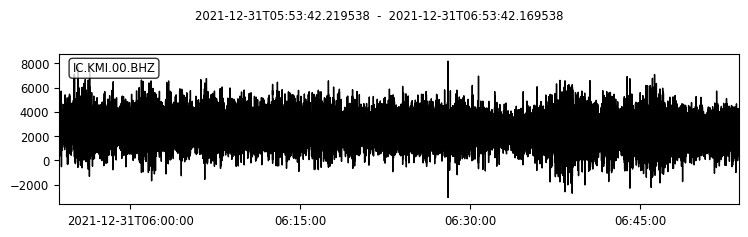

For event 20211230191929687


<Figure size 1152x216 with 0 Axes>

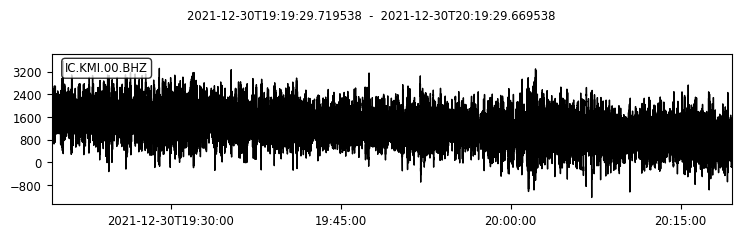

For event 20211230132436748


<Figure size 1152x216 with 0 Axes>

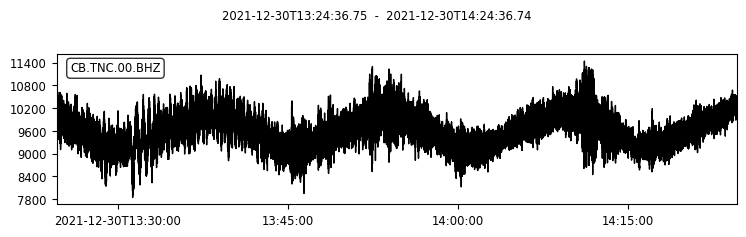

For event 20211230131317562


<Figure size 1152x216 with 0 Axes>

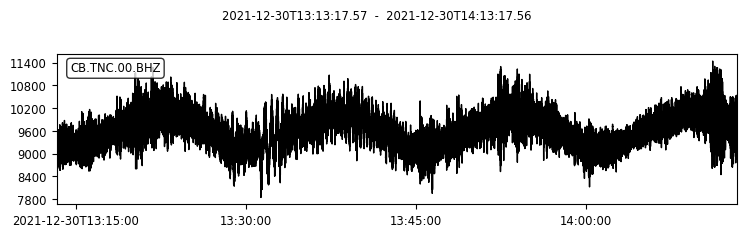

For event 20211230064708885


<Figure size 1152x216 with 0 Axes>

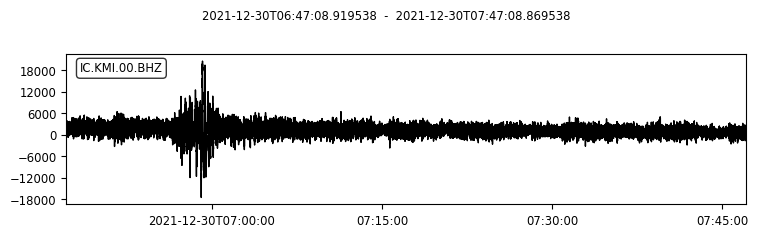

For event 20211230001954707


<Figure size 1152x216 with 0 Axes>

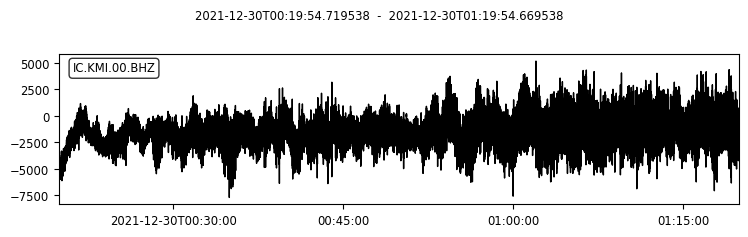

In [3]:
# Storing the data streams for multiple events
streams = []

for event_fname in event_names:
    print(f"For event {event_fname}")
    datadir = f"./Download/{provider1}/miniseed/{year1}/{event_fname}"

    # Read in all vertical-component mseed files for one event
    st = obspy.read(f"{datadir}/*Z.mseed")
    streams.append(st)
    
    num = 0  # View nth waveform
    fig = plt.figure(figsize=(16, 3))
    st[num].plot() 
    plt.show()

In [4]:
# Analyzing a single event
st = streams[0]

print("Data for a single event:")
print(st)

# Number of traces
trace = st[0]
print(f"\nNumber of traces: {len(st)}")

# Extracting a single trace
print(f"\nExtracting a single trace:")
print(trace)

# Extracting the stats for a single trace
print(f"\nStats for a single trace:")
print(trace.stats)

Data for a single event:
14 Trace(s) in Stream:
IC.KMI.00.BHZ  | 2021-12-31T05:53:42.219538Z - 2021-12-31T06:53:42.169538Z | 20.0 Hz, 72000 samples
MM.KTA..HHZ    | 2021-12-31T05:53:42.200000Z - 2021-12-31T06:53:42.190000Z | 100.0 Hz, 360000 samples
MM.KTN..HHZ    | 2021-12-31T05:53:42.198400Z - 2021-12-31T06:53:42.188400Z | 100.0 Hz, 360000 samples
MM.NGU..HHZ    | 2021-12-31T05:53:42.200000Z - 2021-12-31T06:53:42.190000Z | 100.0 Hz, 360000 samples
MM.TGI..HHZ    | 2021-12-31T05:53:42.200000Z - 2021-12-31T06:53:42.190000Z | 100.0 Hz, 360000 samples
MM.YGN..HHZ    | 2021-12-31T05:53:42.198400Z - 2021-12-31T06:53:42.188400Z | 100.0 Hz, 360000 samples
RM.SLV..BHZ    | 2021-12-31T05:53:42.219538Z - 2021-12-31T06:53:42.169538Z | 20.0 Hz, 72000 samples
TM.CMAI.00.HHZ | 2021-12-31T05:53:42.200000Z - 2021-12-31T06:53:42.190000Z | 100.0 Hz, 360000 samples
TM.CMMT.00.HHZ | 2021-12-31T05:53:42.200000Z - 2021-12-31T06:53:42.190000Z | 100.0 Hz, 360000 samples
TM.CRAI.00.HHZ | 2021-12-31T05:53:42.2

In [5]:
# Reading the Stations
station = f"./Stations/stations_{provider1}_{year1}-{year2}.txt"

# Here `sst` represents the individual traces
for sst in st:
    netwk = sst.stats.network
    stanm = sst.stats.station
    print(netwk, stanm)
    
    with open(station, "r") as stafiles:
        stafiles.readline()
        for i, file in enumerate(stafiles):
            sta = file.split("|")
            if netwk in sta and stanm in sta:
                stlo = sta[5]
                stla = sta[4]
                distaz = client.distaz(stla, stlo, lat, lon)
                distinm = distaz['distance'] * 111.19 * 1000
                sst.stats.distance = distinm
                print(distaz['distance'],distinm)
                break

IC KMI
89.0409 9900457.670999998
MM KTA
94.03845 10456135.2555
MM KTN
90.15492 10024325.5548
MM NGU
94.16642 10470364.239799999
MM TGI
92.16339 10247647.3341
MM YGN
91.46564 10170064.511599999
RM SLV
86.48383 9616137.0577
TM CMAI
90.0962 10017796.478
TM CMMT
89.74864 9979151.2816
TM CRAI
89.06253 9902862.7107
TM LOEI
86.8871 9660976.649
TM MHIT
90.79998 10096049.7762
TM PBKT
87.08847 9683366.9793
TM PHRA
88.50202 9840539.6038


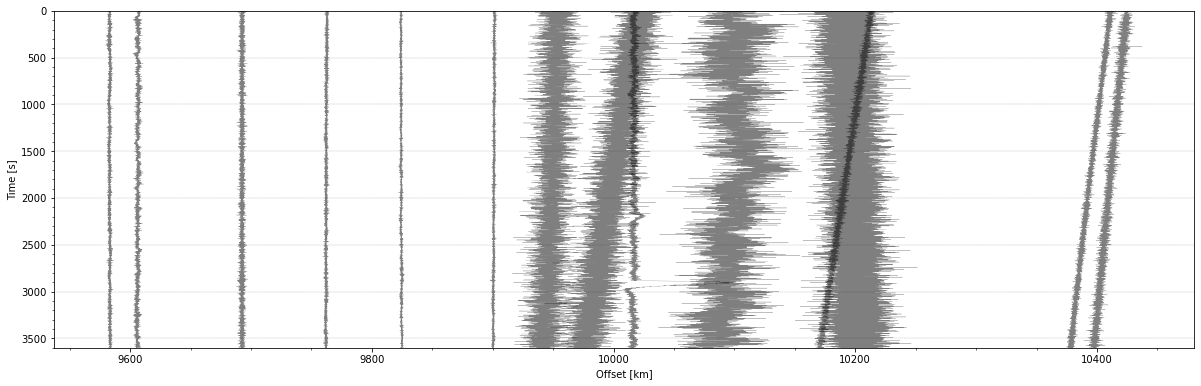

In [6]:
fig = plt.figure(figsize=(18, 6))
st.plot(type='section', recordlength=3600, time_down=True, linewidth=.25, 
    grid_linewidth=.25, show=False, fig=fig, scale=2.0)
plt.show()